Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 56.562286377
Epoch: 0002 cost= 24.740070343
Epoch: 0003 cost= 21.155673981
Epoch: 0004 cost= 17.080780029
Epoch: 0005 cost= 11.824073792
Epoch: 0006 cost= 13.288061142
Epoch: 0007 cost= 18.838130951
Epoch: 0008 cost= 15.039216042
Epoch: 0009 cost= 9.530513763
Epoch: 0010 cost= 9.884954453
Epoch: 0011 cost= 11.556127548
Epoch: 0012 cost= 8.047803879
Epoch: 0013 cost= 9.515520096
Epoch: 0014 cost= 9.127441406
Epoch: 0015 cost= 9.723478317
Epoch: 0016 cost= 8.621444702
Epoch: 0017 cost= 8.267599106
Epoch: 0018 cost= 6.879411697
Epoch: 0019 cost= 9.658369064
Epoch: 0020 cost= 5.632677078
Optimization Finished!
accuracy of training data: 0.828125
Accuracy of testing data: 0.8203125


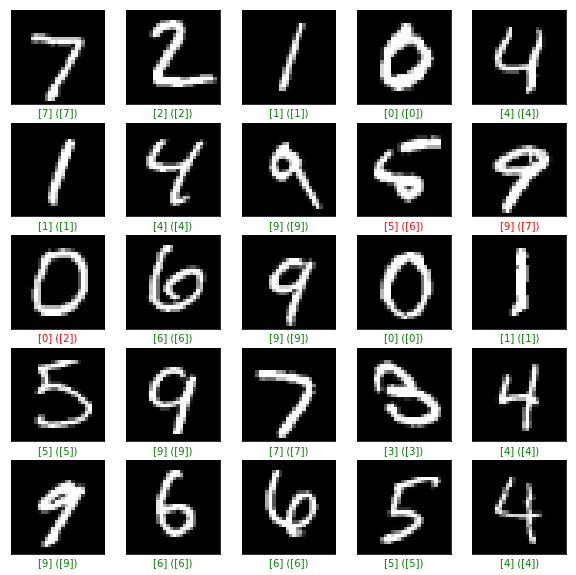

In [20]:
# %load multilayer_perceptron.py
# import warnings
# warnings.filterwarnings('ignore')

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1]) #None is placeholder so that it can handle whatever batch size is given
y = tf.placeholder("float", [None, n_classes]) #None is placeholder so that it can handle whatever batch size is given

x_flat = tf.reshape(x, [-1, n_input]) #-1 is to infer the shape given by batch size

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
#     print("logits[0:10,:]:",sess.run(logits[0:10,:],feed_dict={x: batch_x, y: batch_y}))
#     print("label:",sess.run(y[0:10,:],feed_dict={x: batch_x, y: batch_y}))
#     print("correct_prediction:",sess.run(correct_prediction[0:10],feed_dict={x: batch_x, y: batch_y}))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("accuracy of training data:", sess.run(accuracy,feed_dict={x: batch_x, y: batch_y}))
    # Decrease test_size if you don't have enough memory
    test_size = 256
    print("Accuracy of testing data:", accuracy.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size]}))
    
    # Plot the first 25 test images, their predicted label, and the true label
    # Color correct predictions in green, incorrect predictions in red
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plotImage = mnist.test.images[i].reshape(28,28)
        plt.imshow(plotImage,cmap='gray')       
        true_label = sess.run(tf.argmax(y, 1), feed_dict={y:mnist.test.labels[i].reshape(1,10)})
        predicted_label = sess.run(tf.argmax(logits,1),feed_dict={x: mnist.test.images[i].reshape(1,28,28,1), y: mnist.test.labels[i].reshape(1,10)})
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel("{} ({})".format(true_label, predicted_label),
                                                     color=color)